In [19]:
#| echo: false
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
insurance_data = pd.read_csv("/Users/avanthpakanati/Desktop/ECON:HLTH Research Seminar /Homework5/data/Output/acs_insurance.txt", sep="\t")
expansion_data = pd.read_csv("/Users/avanthpakanati/Desktop/ECON:HLTH Research Seminar /Homework5/data/Output/medicaid_expansion.txt", sep="\t")
medicaid_data = pd.read_csv("/Users/avanthpakanati/Desktop/ECON:HLTH Research Seminar /Homework5/data/Output/acs_medicaid.txt", sep="\t")



HOMEWORK #5 BY AVANTH PAKANATI

[ACCESS GITHUB HERE](https://github.com/avanthp/Homework5.git)

Question 1

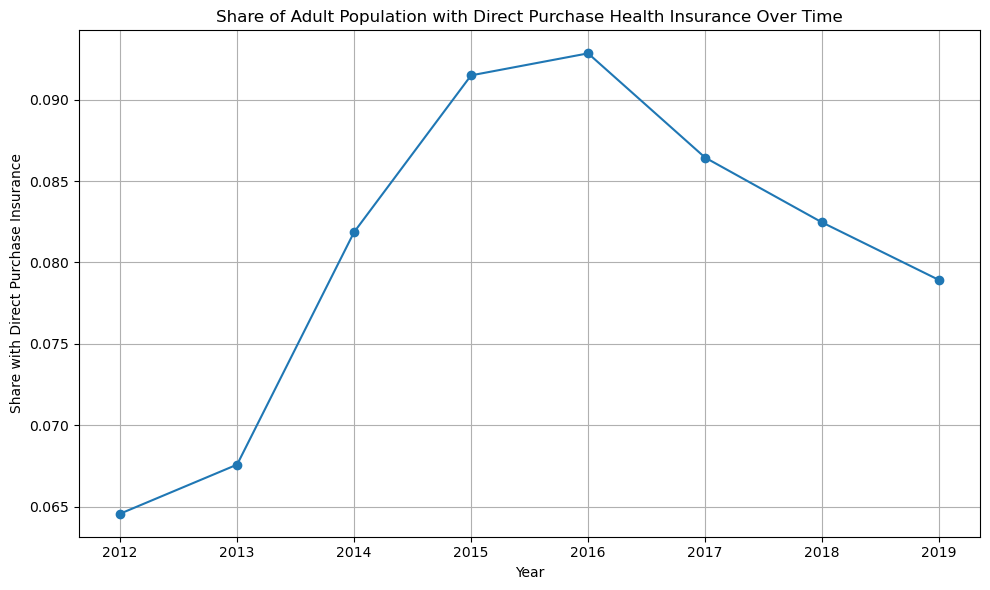

In [20]:
#| echo: false
#Question 1 

# Calculate the share of adults with direct purchase insurance
insurance_data['direct_share'] = insurance_data['ins_direct'] / insurance_data['adult_pop']

# Group by year and sum across all states
national_share = insurance_data.groupby('year')[['ins_direct', 'adult_pop']].sum()

# Calculate national share of direct purchase insurance
national_share['direct_share'] = national_share['ins_direct'] / national_share['adult_pop']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(national_share.index, national_share['direct_share'], marker='o')
plt.title('Share of Adult Population with Direct Purchase Health Insurance Over Time')
plt.xlabel('Year')
plt.ylabel('Share with Direct Purchase Insurance')
plt.grid(True)
plt.tight_layout()
plt.show()





Question 2: 
Initially the share of adults with direct purchase health insurance increased due to the ACA, but several policy changes caused it to decline in the years after. Several policy weakened the marketplace of the ACA. The federal government significantly cut down the funding for the ACA and this led to lower public awareness. 

Question 3

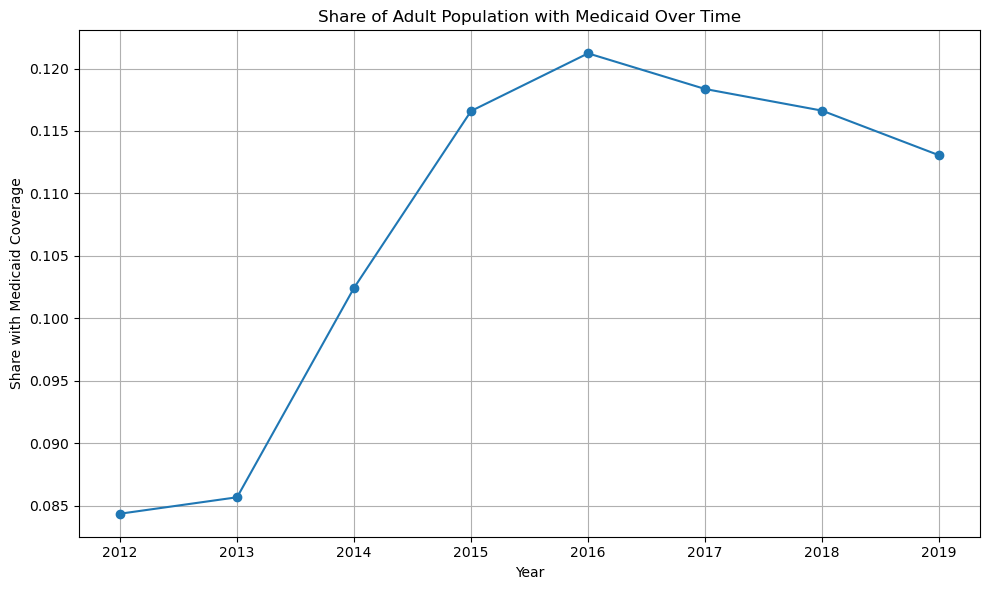

In [21]:
#| echo: false
#Question 3 

insurance_data['medicaid_share'] = insurance_data['ins_medicaid'] / insurance_data['adult_pop']
medicaid_national_share = insurance_data.groupby('year')[['ins_medicaid', 'adult_pop']].sum()

medicaid_national_share['medicaid_share'] = medicaid_national_share['ins_medicaid'] / medicaid_national_share['adult_pop']

medicaid_national_share = insurance_data.groupby('year')[['ins_medicaid', 'adult_pop']].sum()

medicaid_national_share['medicaid_share'] = medicaid_national_share['ins_medicaid'] / medicaid_national_share['adult_pop']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(medicaid_national_share.index, medicaid_national_share['medicaid_share'], marker='o', linestyle='-')
plt.title('Share of Adult Population with Medicaid Over Time')
plt.xlabel('Year')
plt.ylabel('Share with Medicaid Coverage')
plt.grid(True)
plt.tight_layout()
plt.show()

Question 4

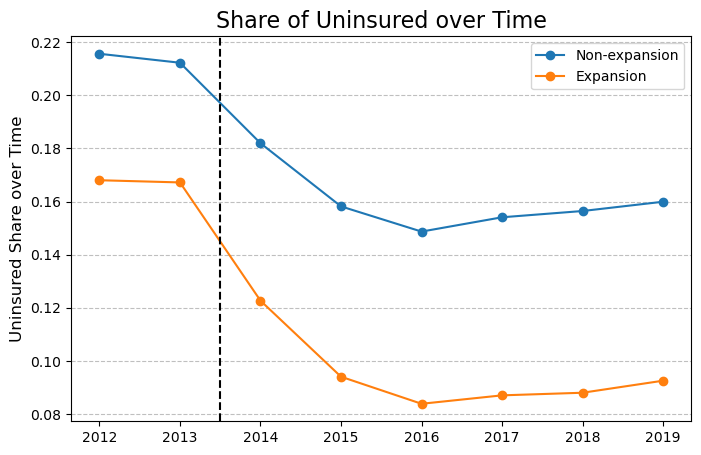

In [22]:
#| echo: false
warnings.filterwarnings("ignore")
#Question 4
# Filter for states that expanded in 2014 or never expanded
medicaid_df = medicaid_data[
    medicaid_data['expand_year'].isna() | (medicaid_data['expand_year'] == 2014)
]

# Calculate uninsured share
medicaid_df['uninsured_share'] = medicaid_df['uninsured'] / medicaid_df['adult_pop']

# Group by expansion status and year, then take mean uninsured share
summary_df = (
    medicaid_df.groupby(['expand_ever', 'year'])['uninsured_share']
    .mean()
    .reset_index()
)

# Plotting
plt.figure(figsize=(8, 5))

for key, grp in summary_df.groupby('expand_ever'):
    plt.plot(grp['year'], grp['uninsured_share'], marker='o',
             label='Expansion' if key else 'Non-expansion')

plt.axvline(x=2013.5, color='black', linestyle='--')
plt.title('Share of Uninsured over Time', fontsize=16)
plt.xlabel('')
plt.ylabel('Uninsured Share over Time', fontsize=12)
plt.grid(axis='y', color='gray', linestyle='--', alpha=0.5)
plt.legend()
plt.show()

Question 5

In [23]:
#| echo: false
warnings.filterwarnings("ignore")

#Question 5


#filter for years 2012 and 2015 
filtered_medicaid = medicaid_data[medicaid_data['year'].isin([2012, 2015])]

expansion = filtered_medicaid.loc[filtered_medicaid['expand_year'] <= 2014, 'State'].unique()
non_expansion = filtered_medicaid.loc[filtered_medicaid['expand_ever'] == False, 'State'].unique()


final_data = filtered_medicaid[filtered_medicaid['State'].isin(list(expansion) + list(non_expansion))]


# Calculate uninsured share
final_data['uninsured_share'] = final_data['uninsured'] / final_data['adult_pop']

grouped = final_data.groupby(['year', 'expand_ever'])['uninsured_share'].mean().reset_index()


dd_table = grouped.pivot(index='expand_ever', columns='year', values='uninsured_share')
dd_table.index = ['Non-Expansion States', 'Expansion States']

print(dd_table)




year                      2012      2015
Non-Expansion States  0.215653  0.158208
Expansion States      0.168052  0.094090


Question 6

In [24]:
#| echo: false

#Question 6
# Filter States  
final_data = medicaid_df[
    medicaid_df['expand_year'].isna() | (medicaid_df['expand_year'] == 2014)
]

final_data = final_data.dropna(subset=['expand_ever'])


final_data['D'] = final_data['expand_ever'].astype(int)
final_data['Post'] = (final_data['year'] >= 2014).astype(int)
final_data['D_Post'] = final_data['D'] * final_data['Post']

model = smf.ols('uninsured_share ~ D + Post + D_Post', data=final_data).fit(
    cov_type='cluster', cov_kwds={'groups': final_data['State']}
)

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        uninsured_share   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     135.8
Date:                Sat, 03 May 2025   Prob (F-statistic):           5.93e-22
Time:                        15:56:45   Log-Likelihood:                 628.45
No. Observations:                 352   AIC:                            -1249.
Df Residuals:                     348   BIC:                            -1233.
Df Model:                           3                                         
Covariance Type:              cluster                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2140      0.011     19.009      0.000       0.192       0.236
D             -0.0463      0.016     -2.928      0.003      -0.077      -0.015
Post          -0.0541      0.003    -15.477      0.000      -0.061      -0.047
D_Post        -0.0188      0.007     -2.680      0.007      -0.033      -0.005
==============================================================================
Omnibus:                        5.959   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                5.716
Skew:                           0.294   Prob(JB):                       0.0574
Kurtosis:                       3.212   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
"""

In [25]:
#| echo: false

#creating table 

coefs = model.params[['Post', 'D', 'D_Post']]
std_errs = model.bse[['Post', 'D', 'D_Post']]

results_table = pd.DataFrame({
    'Standard DD': [f"{coefs[i]:.3f} ({std_errs[i]:.3f})" for i in coefs.index]
}, index=['Post 2014', 'Expand', 'Post Expand'])

results_table.loc['Num. Obs.'] = [int(model.nobs)]
results_table.loc['R2'] = [f"{model.rsquared:.3f}"]

print(results_table)

                Standard DD
Post 2014    -0.054 (0.003)
Expand       -0.046 (0.016)
Post Expand  -0.019 (0.007)
Num. Obs.               352
R2                    0.506


Question 7

In [26]:
#| echo: false

#Question 7

# Filter states
final_data = medicaid_df[
    medicaid_df['expand_year'].isna() | (medicaid_df['expand_year'] == 2014)
]

# Drop nans
final_data = final_data.dropna(subset=['expand_ever'])


final_data['D'] = final_data['expand_ever'].astype(int)
final_data['Post'] = (final_data['year'] >= 2014).astype(int)
final_data['D_Post'] = final_data['D'] * final_data['Post']

# TWFE regression
model_twfe = smf.ols('uninsured_share ~ D_Post + C(State) + C(year)', data=final_data).fit(
    cov_type='cluster', cov_kwds={'groups': final_data['State']
                                  }
)

#creating the table

coef_std_post = model.params['Post']
se_std_post = model.bse['Post']

coef_std_expand = model.params['D']
se_std_expand = model.bse['D']

coef_std_inter = model.params['D_Post']
se_std_inter = model.bse['D_Post']

# TWFE estimates
coef_twfe_inter = model_twfe.params['D_Post']
se_twfe_inter = model_twfe.bse['D_Post']

# Build the table
results_table = pd.DataFrame({
    'Standard DD': [
        f"{coef_std_post:.3f} ({se_std_post:.3f})",
        f"{coef_std_expand:.3f} ({se_std_expand:.3f})",
        f"{coef_std_inter:.3f} ({se_std_inter:.3f})",
        int(model.nobs),
        f"{model.rsquared:.3f}"
    ],
    'TWFE': [
        '',  
        '',  
        f"{coef_twfe_inter:.3f} ({se_twfe_inter:.3f})",
        int(model_twfe.nobs),
        f"{model_twfe.rsquared:.3f}"
    ]
}, index=['Post 2014', 'Expand', 'Post x Expand', 'Num. Obs.', 'R2'])

# Display the table
print(results_table)


                  Standard DD            TWFE
Post 2014      -0.054 (0.003)                
Expand         -0.046 (0.016)                
Post x Expand  -0.019 (0.007)  -0.019 (0.008)
Num. Obs.                 352             352
R2                      0.506           0.952


Question 8

In [27]:
#| echo: false

#Question 8
medicaid_df['treat'] = 0
medicaid_df.loc[
    (medicaid_df['year'] >= medicaid_df['expand_year']) & (medicaid_df['expand_year'].notna()),
    'treat'
] = 1

medicaid_df = medicaid_df.dropna(subset=['expand_ever'])

# TWFE 
model_timevarying = smf.ols('uninsured_share ~ treat + C(State) + C(year)', data=medicaid_df).fit(
    cov_type='cluster', cov_kwds={'groups': medicaid_df['State']}
)

#creating table
coef_std_post = model.params['Post']
se_std_post = model.bse['Post']

coef_std_expand = model.params['D']
se_std_expand = model.bse['D']

coef_std_inter = model.params['D_Post']
se_std_inter = model.bse['D_Post']

# TWFE
coef_twfe_inter = model_twfe.params['D_Post']
se_twfe_inter = model_twfe.bse['D_Post']

# Time-varying treatment
coef_timevary = model_timevarying.params['treat']
se_timevary = model_timevarying.bse['treat']

results_table = pd.DataFrame({
    'Standard DD': [
        f"{coef_std_post:.3f} ({se_std_post:.3f})",
        f"{coef_std_expand:.3f} ({se_std_expand:.3f})",
        f"{coef_std_inter:.3f} ({se_std_inter:.3f})",
        int(model.nobs),
        f"{model.rsquared:.3f}"
    ],
    'TWFE': [
        '',  # No Post coefficient in TWFE
        '',  # No Expand coefficient in TWFE
        f"{coef_twfe_inter:.3f} ({se_twfe_inter:.3f})",
        int(model_twfe.nobs),
        f"{model_twfe.rsquared:.3f}"
    ],
    'Time-varying Treatment': [
        '',  # No Post coefficient
        '',  # No Expand coefficient
        f"{coef_timevary:.3f} ({se_timevary:.3f})",
        int(model_timevarying.nobs),
        f"{model_timevarying.rsquared:.3f}"
    ]
}, index=['Post 2014', 'Expand', 'Post x Expand', 'Num. Obs.', 'R2'])

# Display the table
print(results_table)


                  Standard DD            TWFE Time-varying Treatment
Post 2014      -0.054 (0.003)                                       
Expand         -0.046 (0.016)                                       
Post x Expand  -0.019 (0.007)  -0.019 (0.008)         -0.019 (0.008)
Num. Obs.                 352             352                    352
R2                      0.506           0.952                  0.952


Question 9

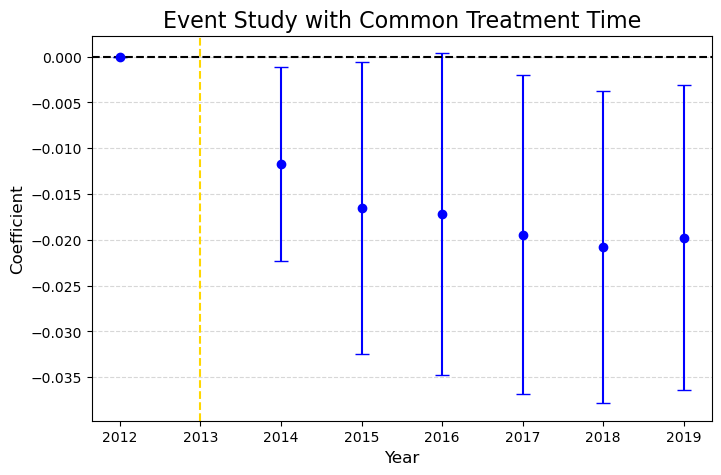

In [28]:
#| echo: false

#QUESTION 9
# Calculate uninsured share
reg_data = medicaid_df[
    (medicaid_df['expand_year'].isna()) | (medicaid_df['expand_year'] == 2014)
].copy()
reg_data['uninsured_share'] = reg_data['uninsured'] / reg_data['adult_pop']

reg_data['relative_year'] = reg_data['year'] - reg_data['expand_year'].fillna(0)
reg_data.loc[reg_data['expand_year'].isna(), 'relative_year'] = np.inf

formula = 'uninsured_share ~ C(relative_year) + C(State) + C(year)'
model_event = smf.ols(formula, data=reg_data).fit(
    cov_type='cluster', cov_kwds={'groups': reg_data['State']}
)

event_years = sorted(set(reg_data['relative_year']) - {np.inf, -1})
calendar_years = [2014 + yr for yr in event_years]

coefs = []
conf_lowers = []
conf_uppers = []

for yr in event_years:
    label = f'C(relative_year)[T.{yr}]'
    coef = model_event.params.get(label, 0)
    ci = model_event.conf_int().loc[label] if label in model_event.params else [0, 0]
    coefs.append(coef)
    conf_lowers.append(ci[0])
    conf_uppers.append(ci[1])

# Plot
plt.figure(figsize=(8, 5))
plt.errorbar(calendar_years, coefs,
             yerr=[np.array(coefs) - np.array(conf_lowers), np.array(conf_uppers) - np.array(coefs)],
             fmt='o', color='blue', capsize=5)
plt.axhline(0, color='black', linestyle='--')
plt.axvline(2013, color='gold', linestyle='--')
plt.xticks(range(2012, 2020))  # Ensure all years from 2012 to 2019 show
plt.title('Event Study with Common Treatment Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Coefficient', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Question 10

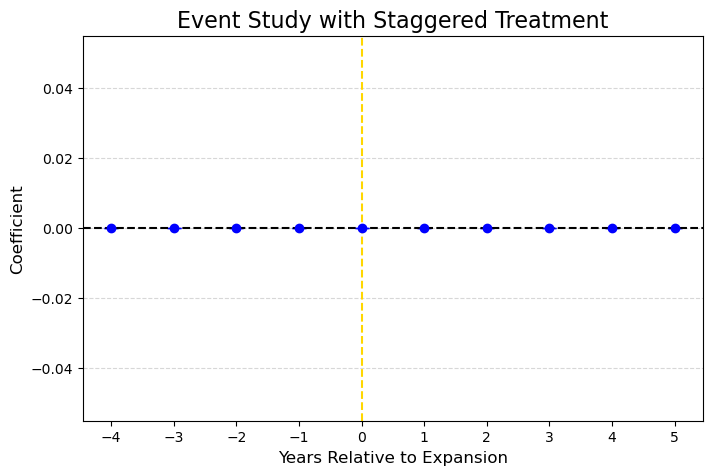

In [29]:
#| echo: false

# Question 10
medicaid_df['relative_year'] = medicaid_df['year'] - medicaid_df['expand_year']

medicaid_df['relative_year'] = medicaid_df['relative_year'].clip(lower=-4, upper=5)

medicaid_df = medicaid_df.dropna(subset=['relative_year', 'State'])

#Run OLS
model_event = smf.ols(
    'uninsured_share ~ C(relative_year) + C(State) + C(year)',
    data=medicaid_df
).fit(cov_type='cluster', cov_kwds={'groups': medicaid_df['State']})

event_years = list(range(-4, 6))  # Include -4 to 5

coefs = []
conf_lowers = []
conf_uppers = []

for yr in event_years:
    if yr == -1:  # Skip base year
        coefs.append(0)
        conf_lowers.append(0)
        conf_uppers.append(0)
    else:
        label = f'C(relative_year)[T.{yr}]'
        coef = model_event.params.get(label, 0)
        ci = model_event.conf_int().loc[label] if label in model_event.params else [0, 0]
        coefs.append(coef)
        conf_lowers.append(ci[0])
        conf_uppers.append(ci[1])

plt.figure(figsize=(8,5))
plt.errorbar(
    event_years,
    coefs,
    yerr=[np.array(coefs)-np.array(conf_lowers), np.array(conf_uppers)-np.array(coefs)],
    fmt='o', color='blue', capsize=5
)
plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='gold', linestyle='--')
plt.xticks(event_years)
plt.xlabel('Years Relative to Expansion', fontsize=12)
plt.ylabel('Coefficient', fontsize=12)
plt.title('Event Study with Staggered Treatment', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()